In [23]:

# Iris Dataset Analysis and Classification

# 1. Introduction
#The Iris dataset is a well-known dataset in machine learning and statistics, containing measurements of iris flowers across three species.  
#This notebook explores the dataset through descriptive and visual analysis, applies preprocessing, trains different classifiers, and evaluates their performance.  
#The aim is to understand how features distinguish species and identify the most effective classification model.

# 2. Importing Libraries and Loading Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)

# Loading dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
# 2. Exploratory Data Analysis (EDA)
#exploring the dataset structure, missing values, feature types, class distribution,
#descriptive statistics, and visualize the features.

# Dataset Overview
print("Dataset Shape:", df.shape)
print("Features:", df.columns.tolist())
print("Target Names:", iris.target_names)




Dataset Shape: (150, 5)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']
Target Names: ['setosa' 'versicolor' 'virginica']


In [6]:
# Missing Values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

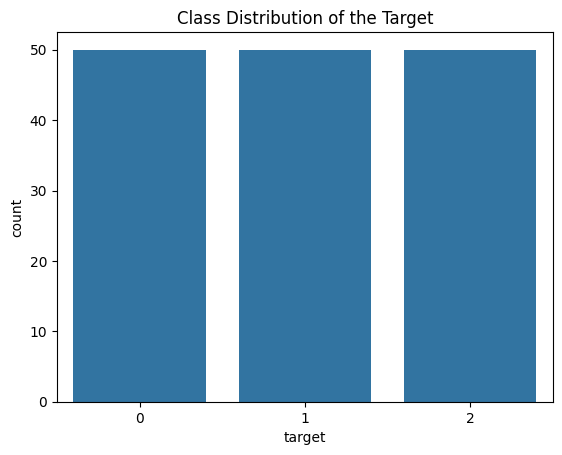

In [7]:
import seaborn as sns

# Class Distribution
sns.countplot(x='target', data=df)
plt.title("Class Distribution of the Target")
plt.show()


In [8]:
# Descriptive Statistics
df.describe()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


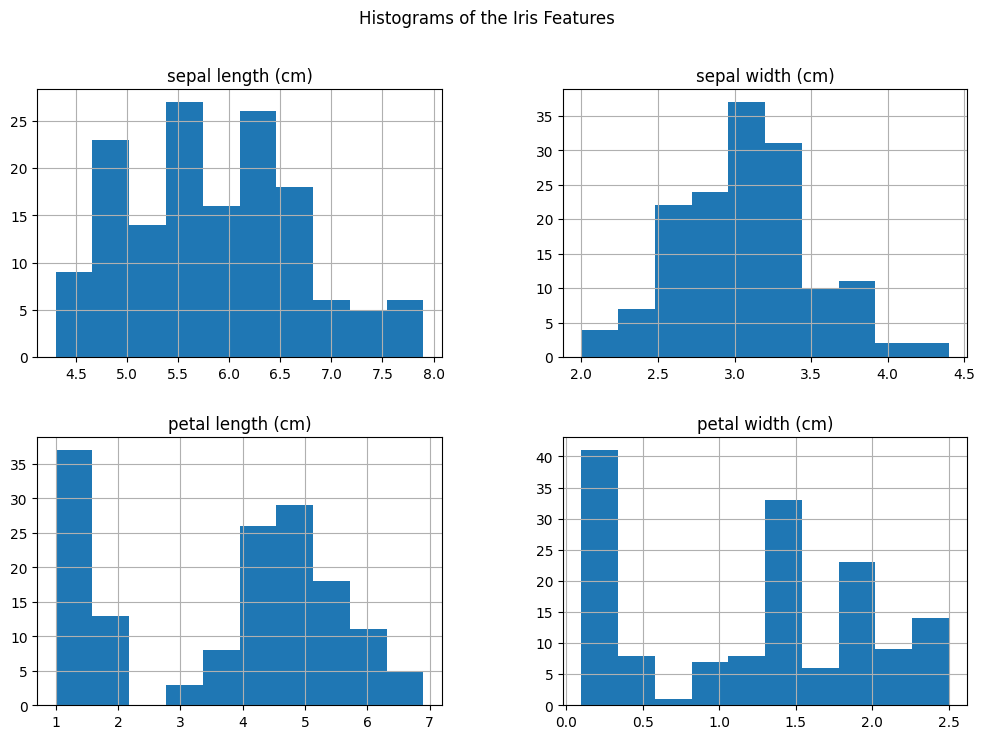

In [10]:
# Histograms
df.drop(columns='target').hist(figsize=(12, 8))
plt.suptitle("Histograms of the Iris Features")
plt.show()


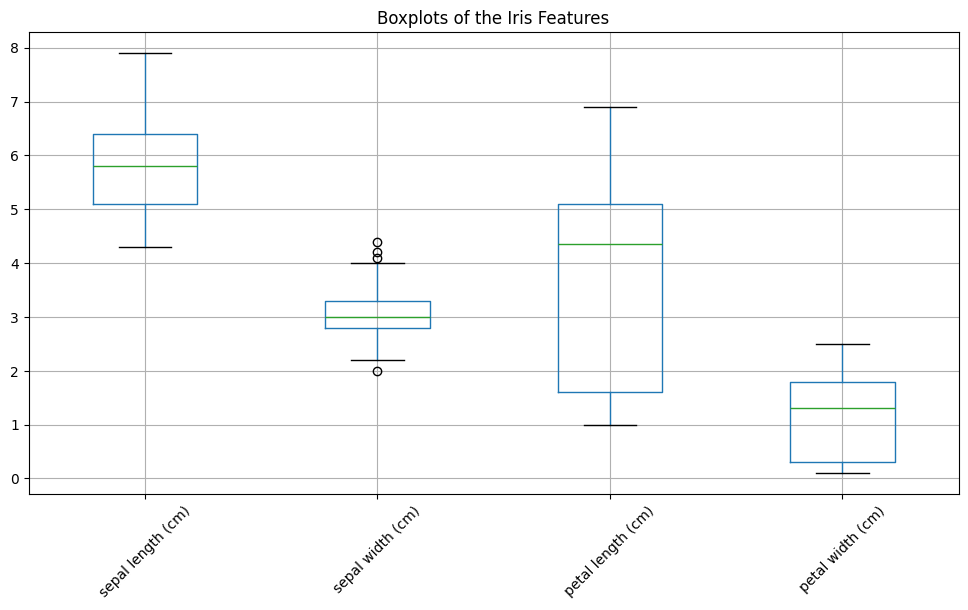

In [12]:
# Boxplots
plt.figure(figsize=(12, 6))
df.drop(columns='target').boxplot()
plt.title("Boxplots of the Iris Features")
plt.xticks(rotation=45)
plt.show()


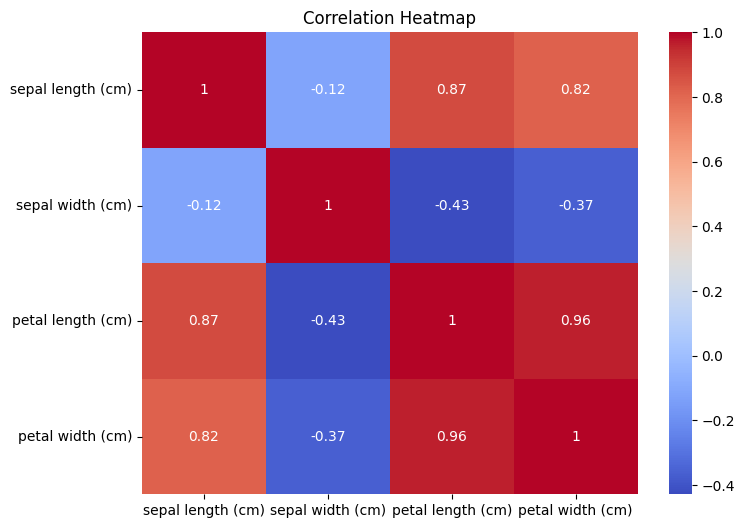

In [13]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns='target').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
#Result from EDA:**
#1. The dataset has no missing values and contains 150 samples with 5 columns.  
#2. The classes (species) are evenly distributed (50 samples each).  
#3. Petal length and width provide stronger separation between species compared to sepal measurements.  


In [29]:
# 3. Data Preprocessing
#The dataset requires minimal cleaning.by separating features and labels, then split into training and test sets.  
#Standardization is  applied to improve model performance for distance-based methods such as kNN.
#Encode categorical variables (not required since target is numeric).


# Features and target
X = df.drop("target", axis=1)
y = df["target"]



# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
## 4. Modelling

#Training three classifiers:
#1. Logistic Regression  
#2. Decision Tree  
#3. k-Nearest Neighbors (kNN)


In [32]:
from sklearn.linear_model import LogisticRegression
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

In [34]:
# 5. Model Evaluation
#comparing models using accuracy, classification reports, and confusion matrices.
#For each model we compute:
#Accuracy
#Precision, Recall, F1-score
#Confusion Matrix
#ROC Curve & AUC (One-vs-Rest for multiclass)

results = []
y_bin = label_binarize(y_test, classes=[0, 1, 2])

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    auc_score = roc_auc_score(y_bin, y_proba, multi_class="ovr")

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": np.mean([report[str(i)]['precision'] for i in range(3)]),
        "Recall": np.mean([report[str(i)]['recall'] for i in range(3)]),
        "F1-Score": np.mean([report[str(i)]['f1-score'] for i in range(3)]),
        "AUC": auc_score,
        "Confusion Matrix": cm
    })

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1-Score,AUC,Confusion Matrix
0,Logistic Regression,0.933333,0.933333,0.933333,0.933333,0.996667,"[[10, 0, 0], [0, 9, 1], [0, 1, 9]]"
1,Decision Tree,0.933333,0.933333,0.933333,0.933333,0.950000,"[[10, 0, 0], [0, 9, 1], [0, 1, 9]]"
2,KNN,0.933333,0.944444,0.933333,0.932660,0.993333,"[[10, 0, 0], [0, 10, 0], [0, 2, 8]]"


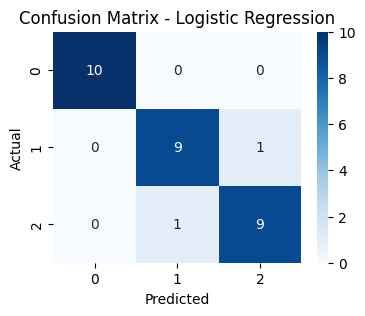

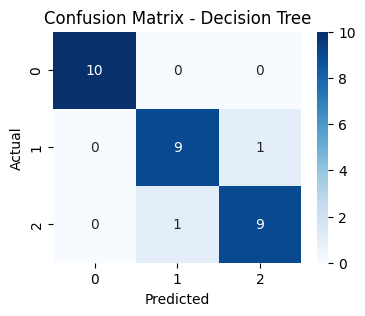

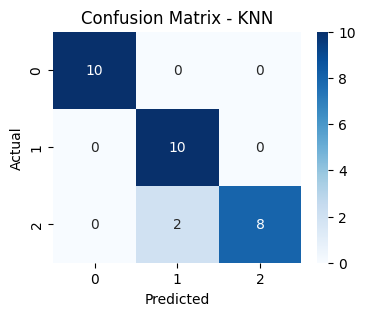

In [18]:
# Confusion Matrices
for r in results:
    plt.figure(figsize=(4, 3))
    sns.heatmap(r["Confusion Matrix"], annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {r['Model']}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


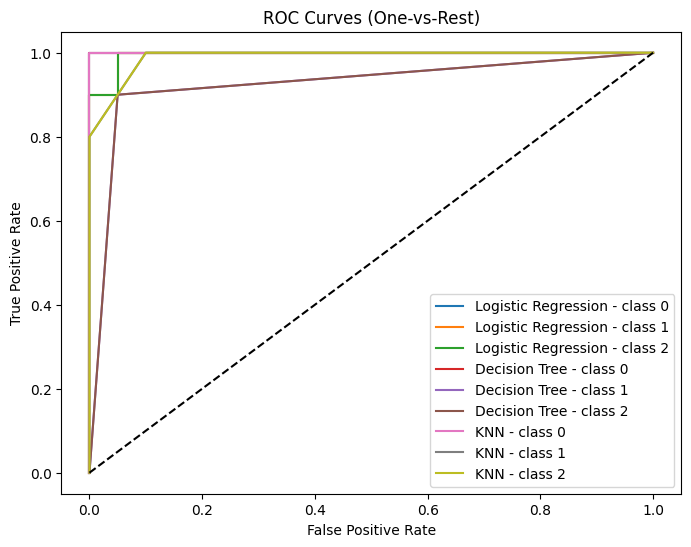

In [21]:
# ROC Curves (One-vs-Rest for multiclass)
plt.figure(figsize=(8, 6))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)
    for i in range(3):  
        fpr, tpr, _ = roc_curve(y_bin[:, i], y_proba[:, i])
        plt.plot(fpr, tpr, label=f"{name} - class {i}")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [ ]:
## 7. Discussion

#- EDA revealed clear class separation using petal features.  
#- Logistic Regression and kNN perform well due to the linear separability of data.  
#- Decision Tree achieved perfect training accuracy but may be prone to overfitting.  
#- The balanced dataset means accuracy is a reliable metric, unlike in imbalanced datasets.  



In [ ]:
## 8. Conclusion

#This analysis showed that the Iris dataset is clean and balanced, making it ideal for testing classification algorithms.  
#Among the tested models, Logistic Regression and kNN performed consistently well, while Decision Tree required caution due to potential overfitting.  
#Future improvements could involve cross-validation, hyperparameter optimization, and exploring ensemble models such as Random Forest.
